# Overview of the BindingDB dataset

##### Loading Data and Imports

In [1]:
# IMPORTS
# base
import pandas as pd
import numpy as np
import itertools
from itertools import combinations

# cleaning
from src.utils.utils import group_categories

# plots
import seaborn as sns
from matplotlib import pyplot as plt
from src.scripts.data_description import (
    plot_availability,
    plot_distributions,
    plot_overlaps,
    categorical_countplot,
)

In [2]:
usecols = [
    "BindingDB Reactant_set_id",
    "Ligand SMILES",
    "Ligand InChI",
    "Ligand InChI Key",
    "BindingDB MonomerID",
    "BindingDB Ligand Name",
    "Target Name",
    "Target Source Organism According to Curator or DataSource",
    "Ki (nM)",
    "IC50 (nM)",
    "Kd (nM)",
    "EC50 (nM)",
    "kon (M-1-s-1)",
    "koff (s-1)",
    "pH",
    "Temp (C)",
    "Curation/DataSource",
    "Article DOI",
    "BindingDB Entry DOI",
    "PMID",
    "PubChem AID",
    "Patent Number",
    "Authors",
    "Institution",
    # 'Link to Ligand in BindingDB', #removed because is nearly always error 404
    # 'Link to Target in BindingDB', #removed because is nearly always error 404
    # 'Link to Ligand-Target Pair in BindingDB', #removed because is nearly always error 404
    "Ligand HET ID in PDB",
    "PDB ID(s) for Ligand-Target Complex",
    "PubChem CID",
    "PubChem SID",
    "ChEBI ID of Ligand",
    "ChEMBL ID of Ligand",
    "DrugBank ID of Ligand",
    "IUPHAR_GRAC ID of Ligand",
    "KEGG ID of Ligand",
    "ZINC ID of Ligand",
    "Number of Protein Chains in Target (>1 implies a multichain complex)",
    "BindingDB Target Chain Sequence",
    "PDB ID(s) of Target Chain",
    "UniProt (SwissProt) Recommended Name of Target Chain",
    "UniProt (SwissProt) Entry Name of Target Chain",
    "UniProt (SwissProt) Primary ID of Target Chain",
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain',
    # 'UniProt (TrEMBL) Entry Name of Target Chain',
    "UniProt (TrEMBL) Primary ID of Target Chain",
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain',
    # 'BindingDB Target Chain Sequence.1',
    # 'PDB ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.1',
    # 'UniProt (SwissProt) Entry Name of Target Chain.1',
    # 'UniProt (SwissProt) Primary ID of Target Chain.1',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.1',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.1',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.1',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.1',
    # 'BindingDB Target Chain Sequence.2',
    # 'PDB ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.2',
    # 'UniProt (SwissProt) Entry Name of Target Chain.2',
    # 'UniProt (SwissProt) Primary ID of Target Chain.2',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.2',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.2',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.2',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.2',
    # 'BindingDB Target Chain Sequence.3',
    # 'PDB ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.3',
    # 'UniProt (SwissProt) Entry Name of Target Chain.3',
    # 'UniProt (SwissProt) Primary ID of Target Chain.3',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.3',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.3',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.3',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.3',
    # 'BindingDB Target Chain Sequence.4',
    # 'PDB ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.4',
    # 'UniProt (SwissProt) Entry Name of Target Chain.4',
    # 'UniProt (SwissProt) Primary ID of Target Chain.4',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.4',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.4',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.4',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.4',
    # 'BindingDB Target Chain Sequence.5',
    # 'PDB ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.5',
    # 'UniProt (SwissProt) Entry Name of Target Chain.5',
    # 'UniProt (SwissProt) Primary ID of Target Chain.5',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.5',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.5',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.5',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.5',
    # 'BindingDB Target Chain Sequence.6',
    # 'PDB ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.6',
    # 'UniProt (SwissProt) Entry Name of Target Chain.6',
    # 'UniProt (SwissProt) Primary ID of Target Chain.6',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.6',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.6',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.6',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.6',
    # 'BindingDB Target Chain Sequence.7',
    # 'PDB ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.7',
    # 'UniProt (SwissProt) Entry Name of Target Chain.7',
    # 'UniProt (SwissProt) Primary ID of Target Chain.7',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.7',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.7',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.7',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.7',
    # 'BindingDB Target Chain Sequence.8',
    # 'PDB ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.8',
    # 'UniProt (SwissProt) Entry Name of Target Chain.8',
    # 'UniProt (SwissProt) Primary ID of Target Chain.8',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.8',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.8',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.8',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.8',
    # 'BindingDB Target Chain Sequence.9',
    # 'PDB ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.9',
    # 'UniProt (SwissProt) Entry Name of Target Chain.9',
    # 'UniProt (SwissProt) Primary ID of Target Chain.9',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.9',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.9',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.9',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.9',
    # 'BindingDB Target Chain Sequence.10',
    # 'PDB ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.10',
    # 'UniProt (SwissProt) Entry Name of Target Chain.10',
    # 'UniProt (SwissProt) Primary ID of Target Chain.10',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.10',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.10',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.10',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.10',
    # 'BindingDB Target Chain Sequence.11',
    # 'PDB ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.11',
    # 'UniProt (SwissProt) Entry Name of Target Chain.11',
    # 'UniProt (SwissProt) Primary ID of Target Chain.11',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.11',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.11',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.11',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.11',
    # 'BindingDB Target Chain Sequence.12',
    # 'PDB ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.12',
    # 'UniProt (SwissProt) Entry Name of Target Chain.12',
    # 'UniProt (SwissProt) Primary ID of Target Chain.12',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.12',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.12',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.12',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.12'
]

In [3]:
df = pd.read_csv(
    r"../data/BindingDB_All.tsv",
    sep="\t",
    usecols=usecols,
)

C:\Users\grede\AppData\Local\Temp\ipykernel_15248\2722730526.py:1: DtypeWarning: Columns (8,9,10,11,12,13,15,17,20,21,22,23,27,28,32,33,35,36,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


## Data availability per Categories

In [4]:
# Defining categories
binding_kinetics = [
    "Ki (nM)",
    "IC50 (nM)",
    "Kd (nM)",
    "EC50 (nM)",
    "kon (M-1-s-1)",
    "koff (s-1)",
    "pH",
    "Temp (C)",
]

target_related = [x for x in usecols if "Target" in x]
ligand_related = [x for x in usecols if "Ligand" in x]
id_columns = [x for x in usecols if ("ID" in x) or ("id" in x)]
id_columns.append("Ligand InChI Key")
names = [x for x in usecols if "Name" in x]
metadata = [
    x
    for x in usecols
    if (x not in target_related)
    and (x not in ligand_related)
    and (x not in id_columns)
    and (x not in names)
    and (x not in binding_kinetics)
]

test = [
    "Ki (nM)",
    "IC50 (nM)",
]

### Binding Kinetics Data

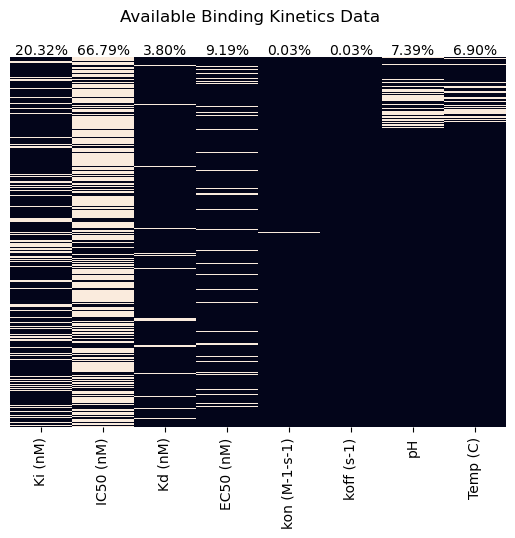

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=1)
plot_availability(
    df=df,
    group=binding_kinetics,
    ax=axs,
)
plt.suptitle("Available Binding Kinetics Data")
plt.show()

In [8]:
# clean binding kinetics data
df.replace(" NV,", np.nan, inplace=True)
for col in binding_kinetics:
    df[col] = df[col].astype(str).str.replace(" C", "")
    df[col] = (
        df[col].astype(str).str.replace(">", "").str.replace("<", "").astype(float)
    )

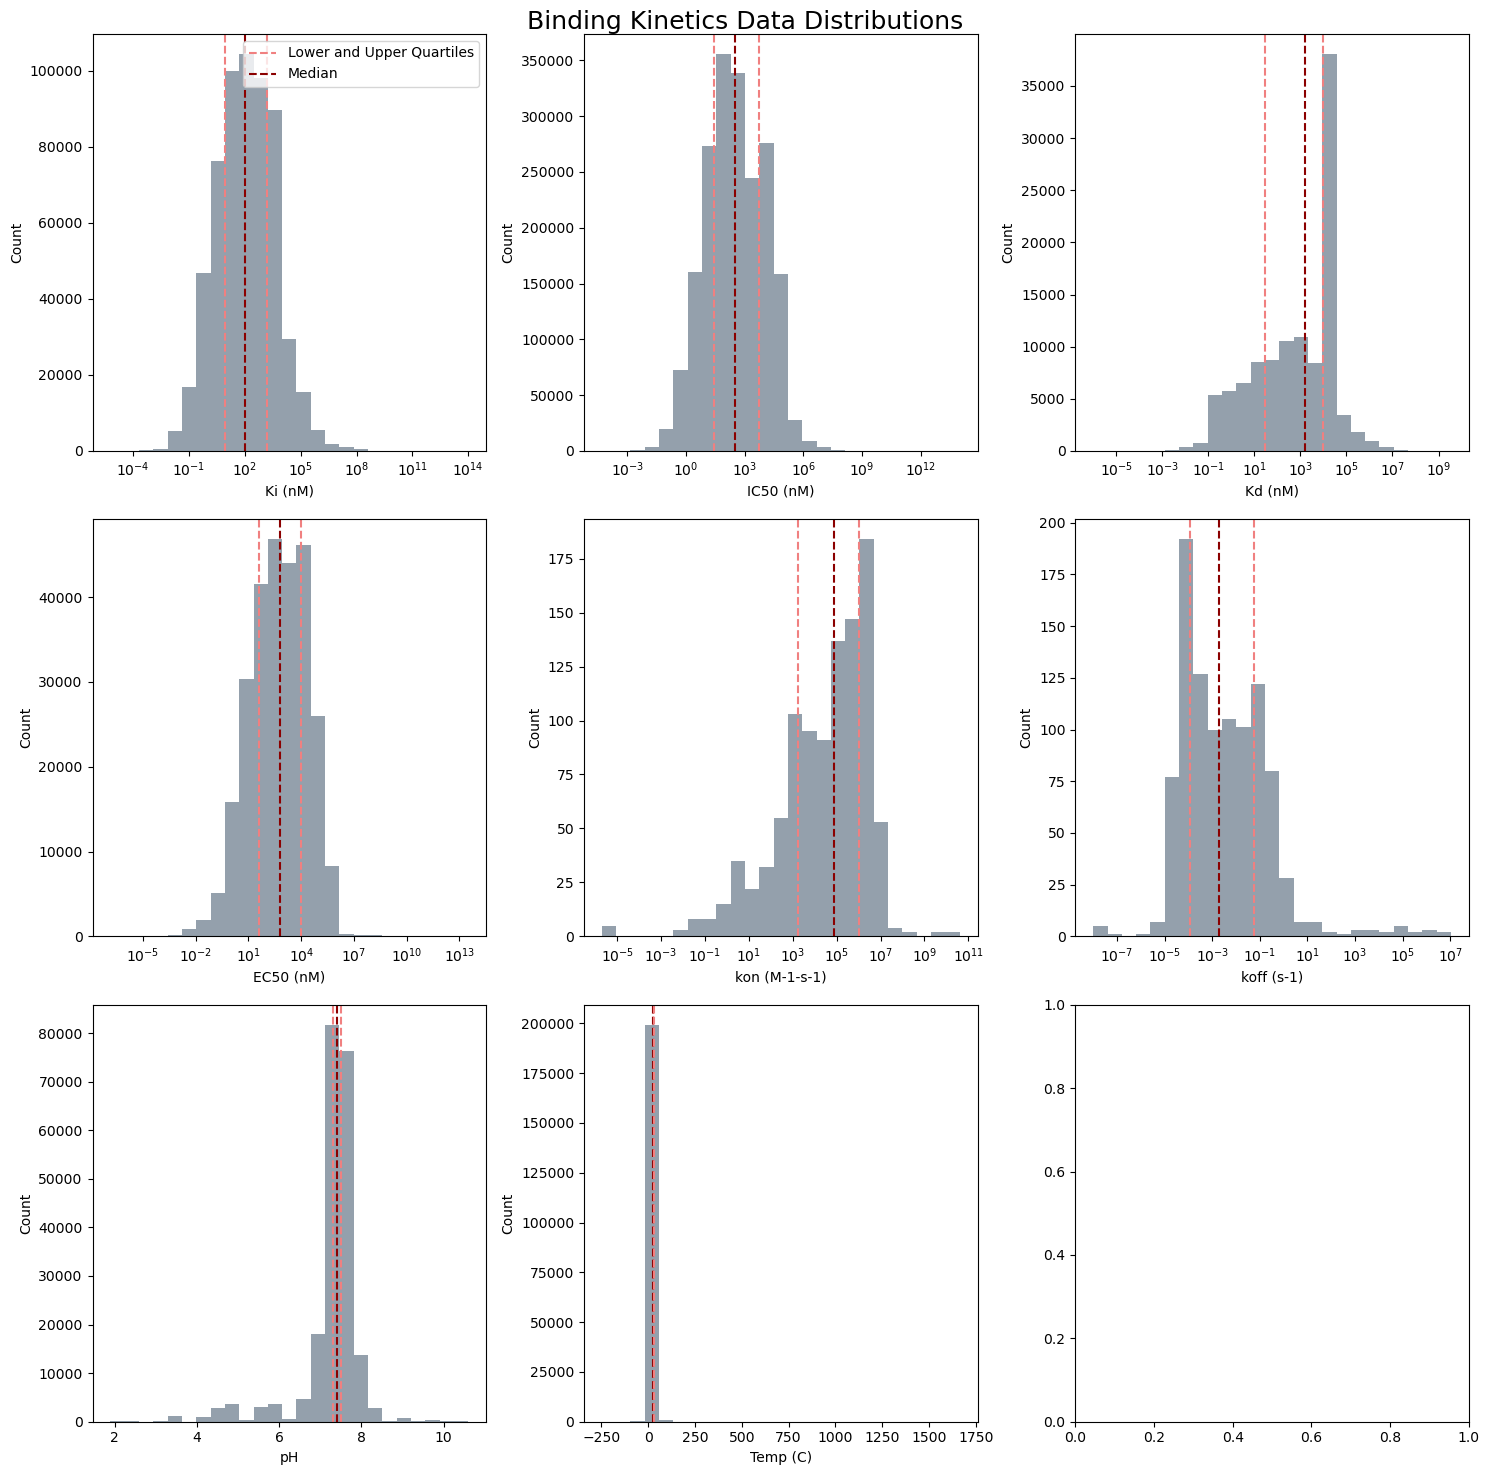

In [10]:
# data distributions
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for idx, (col, ax) in enumerate(zip(binding_kinetics, axs.flatten())):
    if idx == 0:
        show_legend = True
    else:
        show_legend = False
    if col == "pH" or col == "Temp (C)":
        logsc = (False, False)
    else:
        logsc = (True, False)
    plot_distributions(df, col, log_scale=logsc, ax=ax, show_legend=show_legend)
plt.suptitle("Binding Kinetics Data Distributions", fontsize=18)
plt.tight_layout()
plt.show()

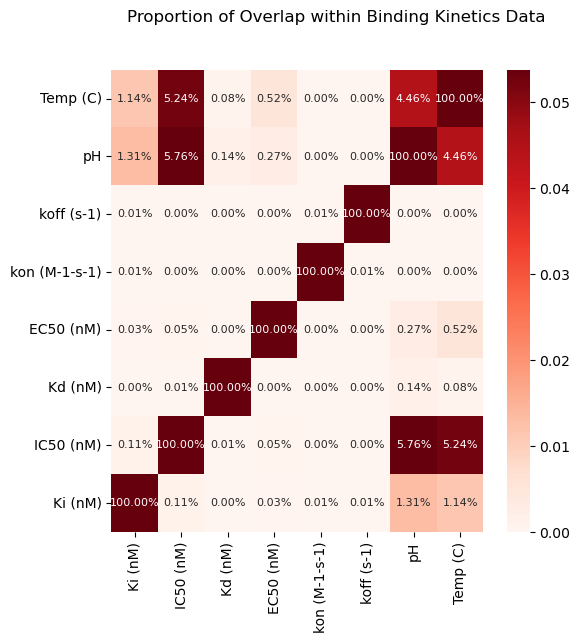

In [11]:
# overlap
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_overlaps(df, binding_kinetics, ax=ax)
plt.suptitle("Proportion of Overlap within Binding Kinetics Data")
plt.show()

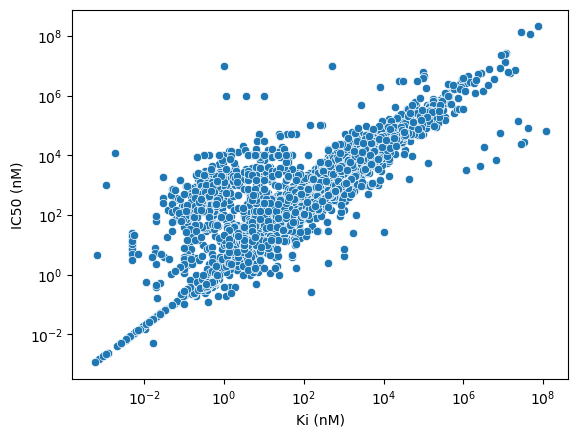

In [12]:
sns.scatterplot(df[["Ki (nM)", "IC50 (nM)"]].dropna(), x="Ki (nM)", y="IC50 (nM)")
plt.loglog()
plt.show()

### Target and Ligand Related Data

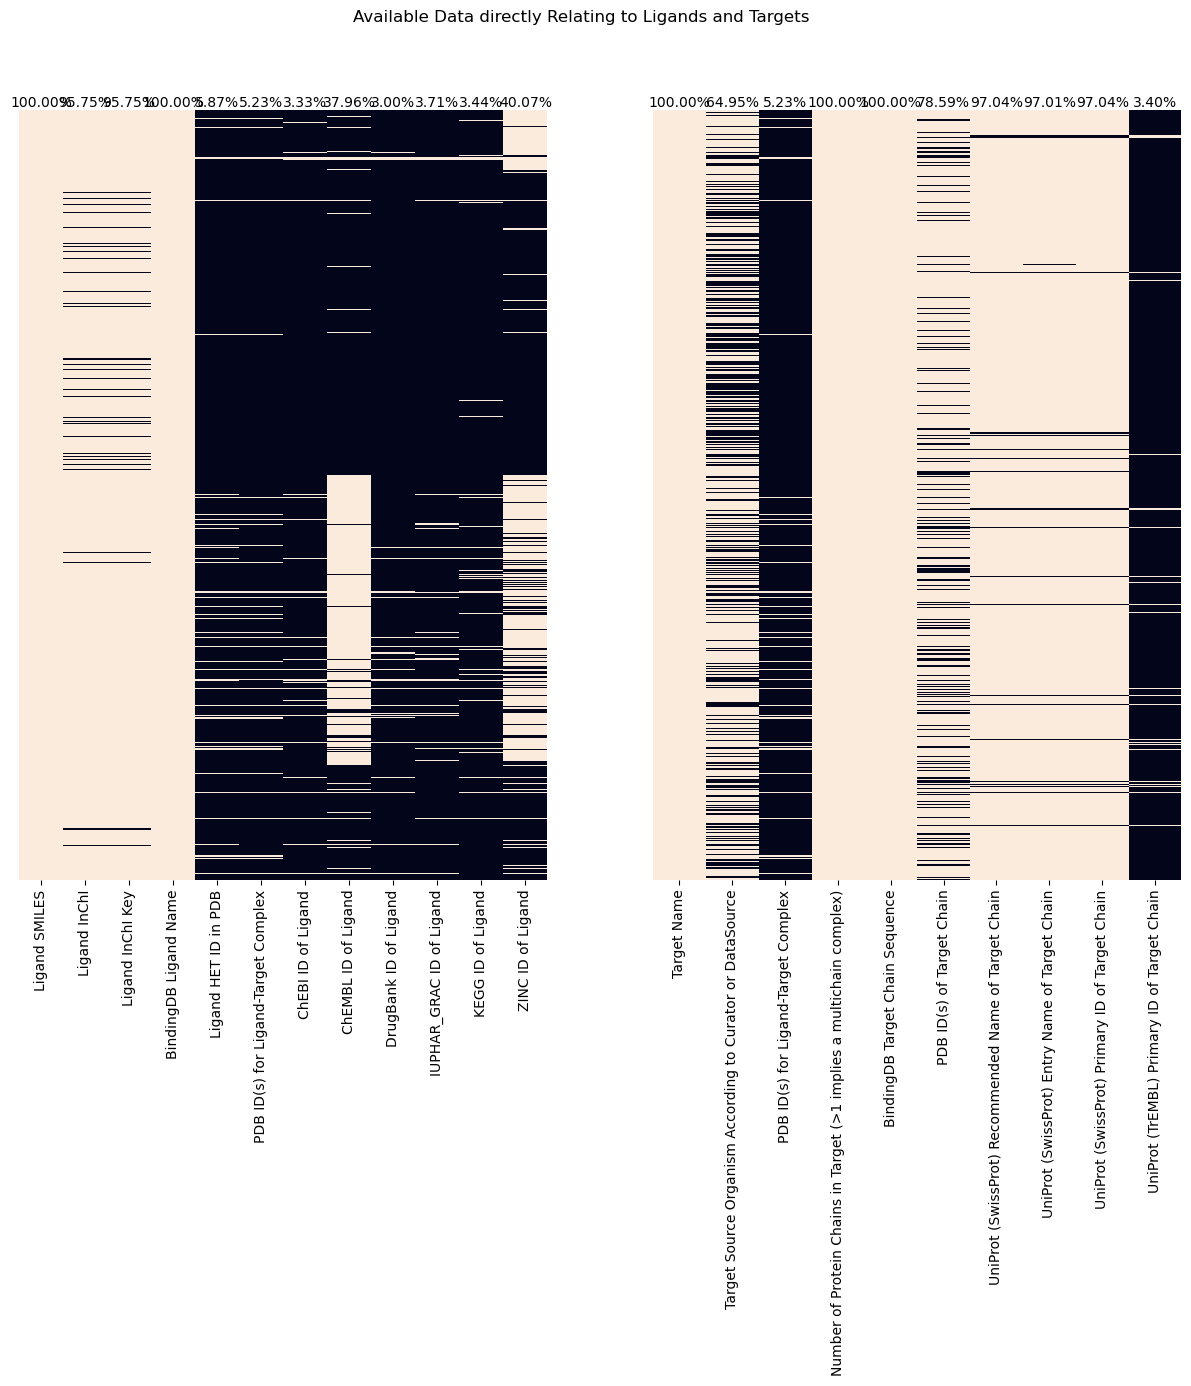

In [ ]:
# availability
ligands_and_targets = list(set(ligand_related + target_related))
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
plot_availability(df=df, group=ligand_related, ax=axs[0])
plot_availability(df=df, group=target_related, ax=axs[1])
plt.suptitle("Available Data directly Relating to Ligands and Targets")
plt.tight_layout()
plt.show()

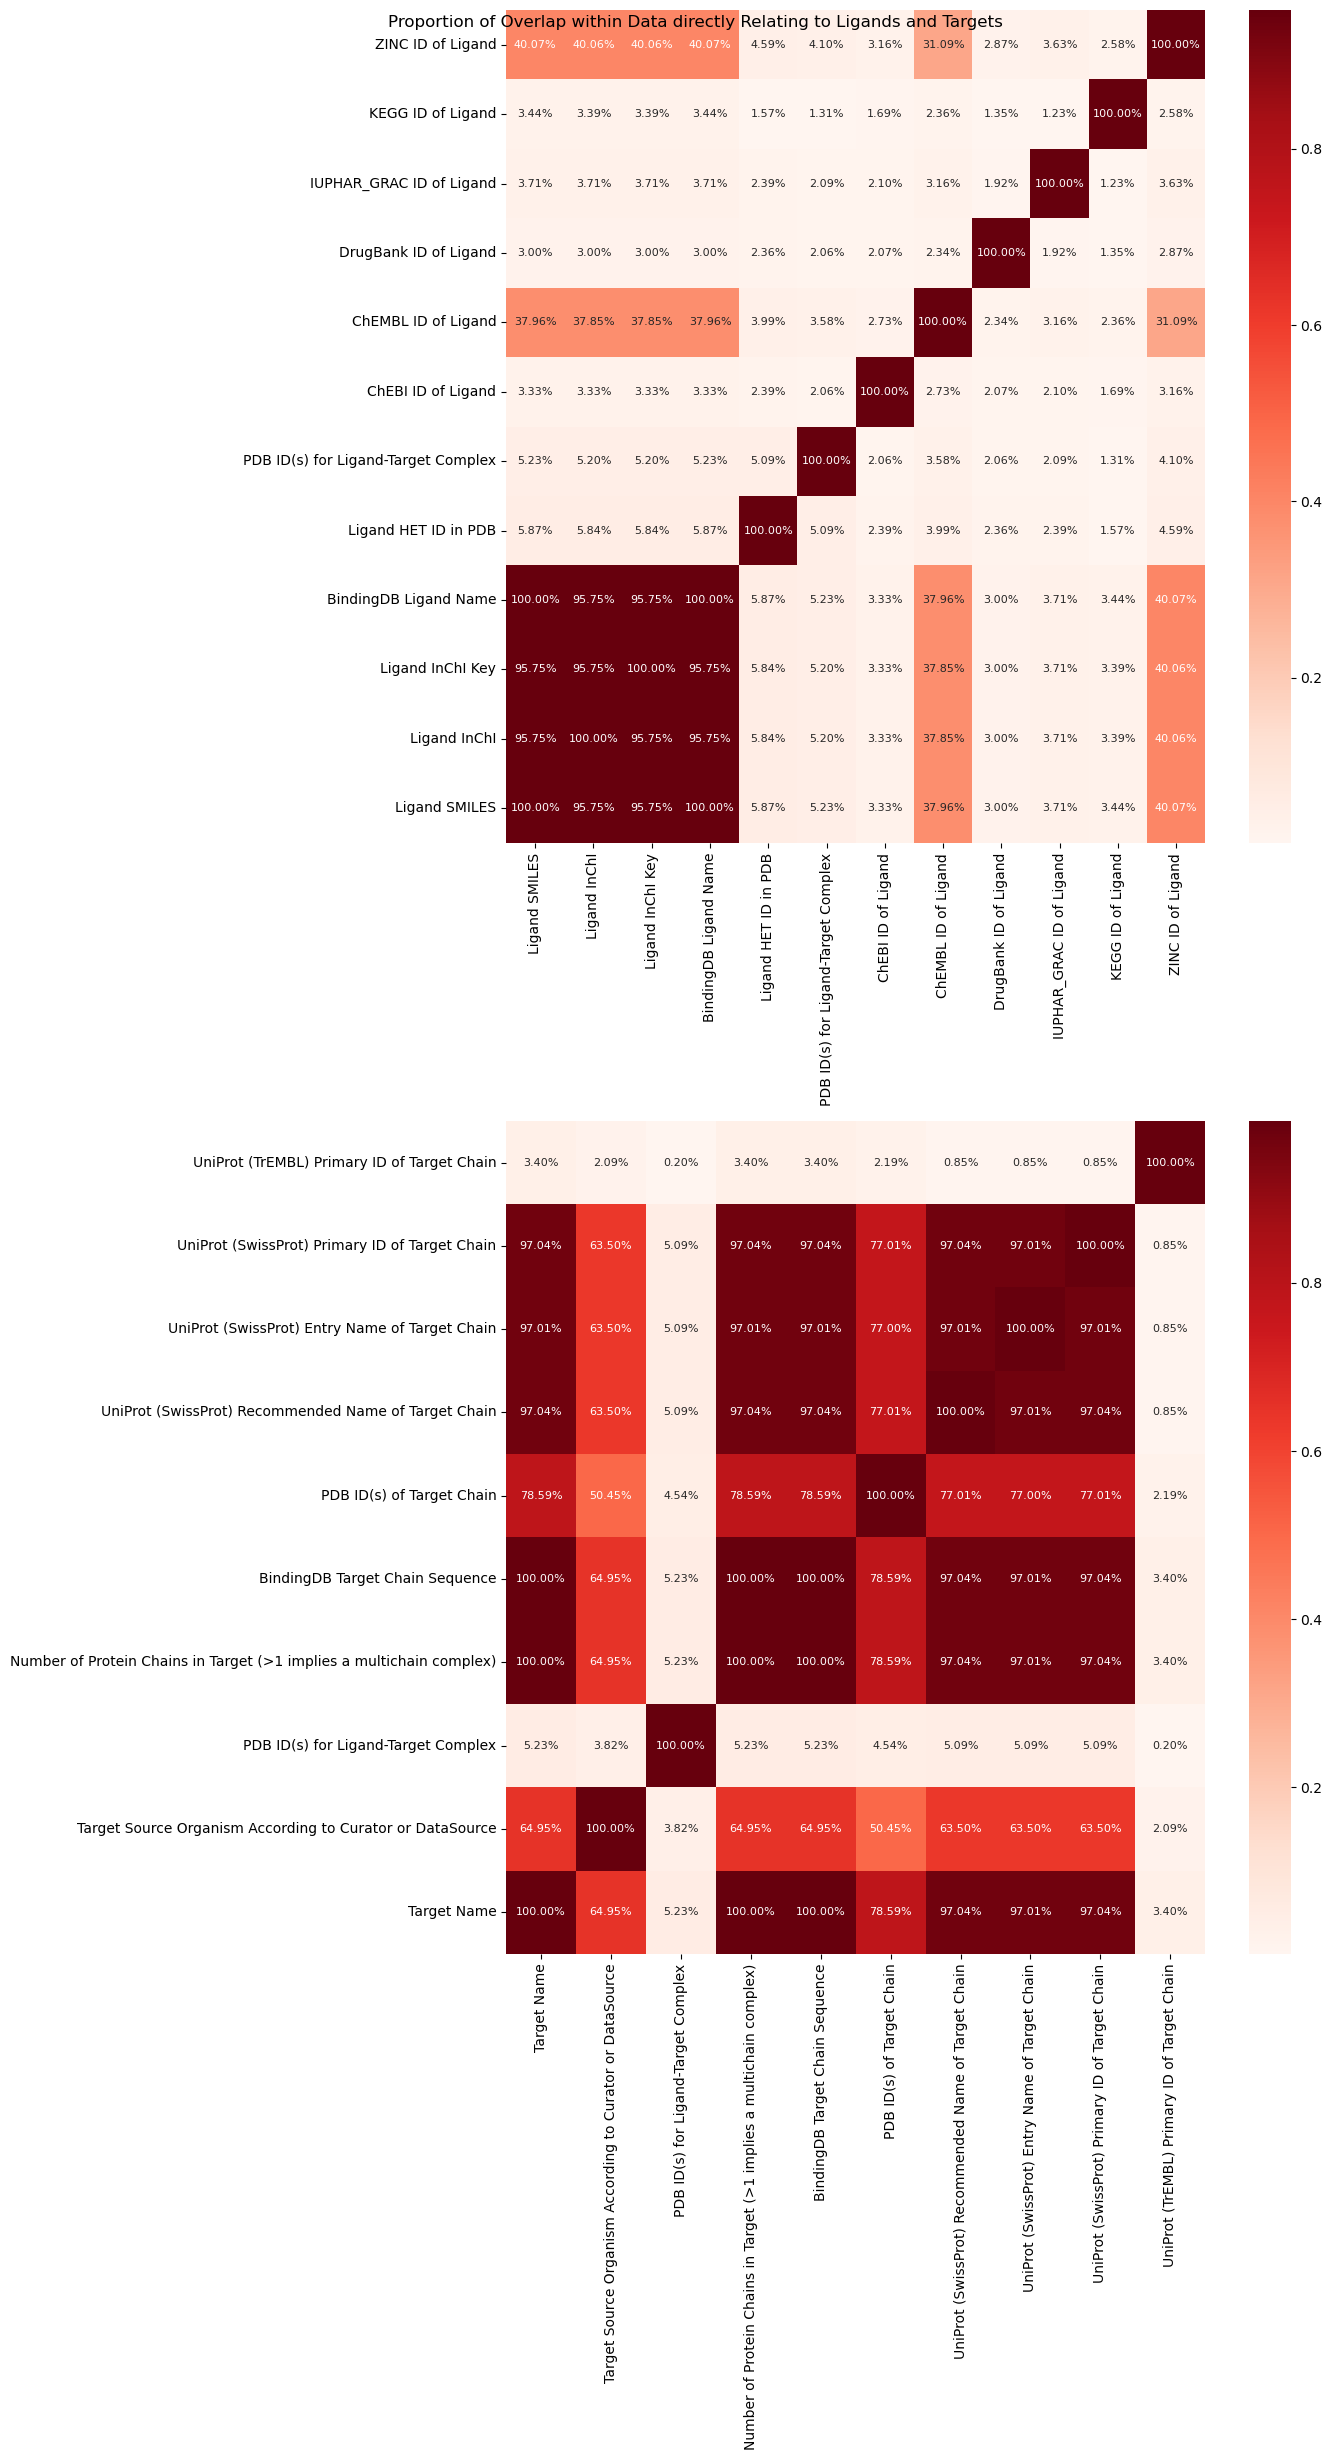

In [14]:
# overlap
fig, axs = plt.subplots(2, 1, figsize=(14, 25))
plot_overlaps(df, ligand_related, ax=axs[0])
plot_overlaps(df, target_related, ax=axs[1])
plt.suptitle(
    "Proportion of Overlap within Data directly Relating to Ligands and Targets"
)
plt.tight_layout()
plt.show()

#### A closer look at Target Organisms

In [15]:
# cleaning target organism data
in_mapping = {
    "Human immunodeficiency virus": ["immunodeficiency virus", "hiv"],
    "Sars coronavirus": ["severe acute respiratory", "sars"],
    "Human herpes virus": ["herpes"],
    "Homo sapiens": ["h. sapiens"],
    "Mus musculus": ["mouse", "m. musculus"],
    "Rattus norvegicus": ["rattus", "r. norvegicus"],
    "Cavia porcellus": ["cavia"],
    "Hepatitis C": [],
    "Escherichia coli": ["coli"],
    "Caenorhabditis elegans": ["elegans"],
    "Influenza virus": ["influenza"],
    "Oryctolagus cuniculus": ["cuniculus"],
    "Streptococcus pyogenes": ["pyogenes"],
    "Plasmodium falciparum": [],
    "Saccharomyces cerevisiae": ["cervisiae"],
    "Streptococcus pneumoniae": [],
    "Mycobacterium tuberculosis": [],
}

f = lambda x: group_categories(
    str(x),
    in_mapping=in_mapping,
    check_key_for_in_mapping=True,
)

df["Target Source Organism According to Curator or DataSource"] = (
    df["Target Source Organism According to Curator or DataSource"]
    .apply(f)
    .apply(str.capitalize)
    .replace("Nan", np.nan)
)

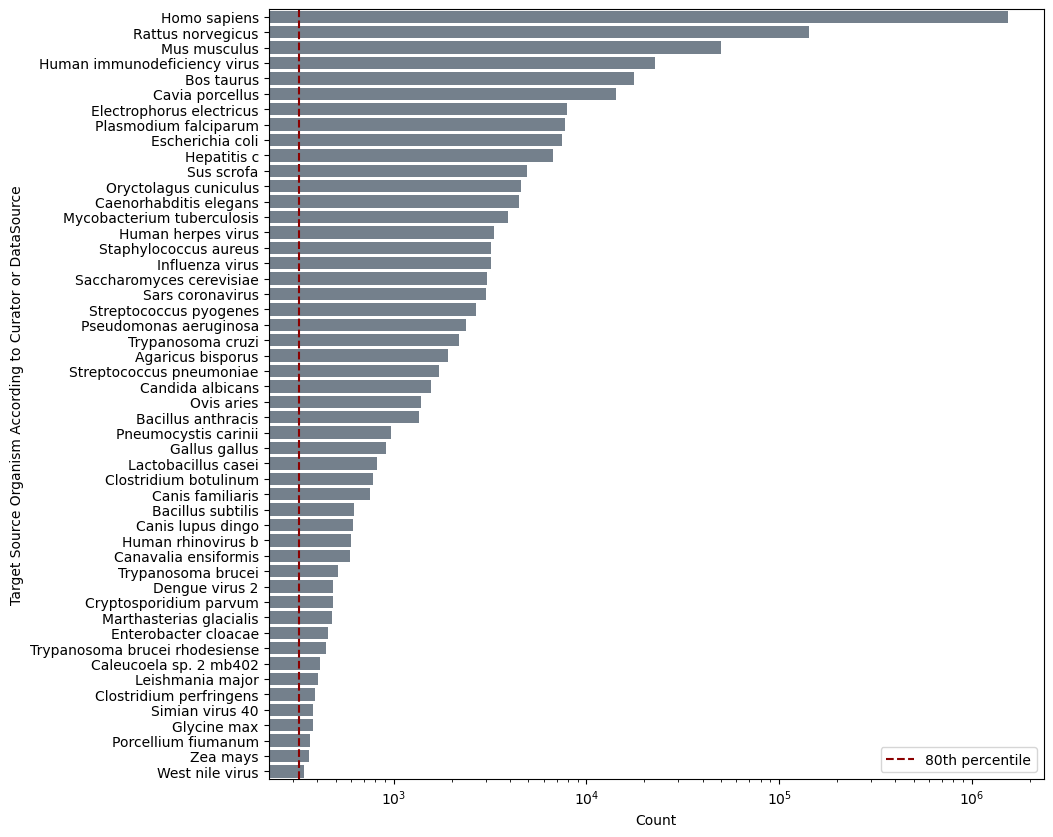

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
categorical_countplot(
    df,
    "Target Source Organism According to Curator or DataSource",
    ax=ax,
    percentile=0.8,
)
plt.show()

### Metadata

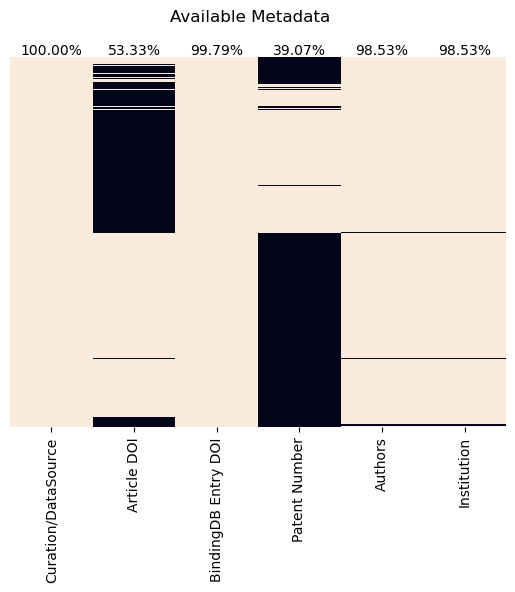

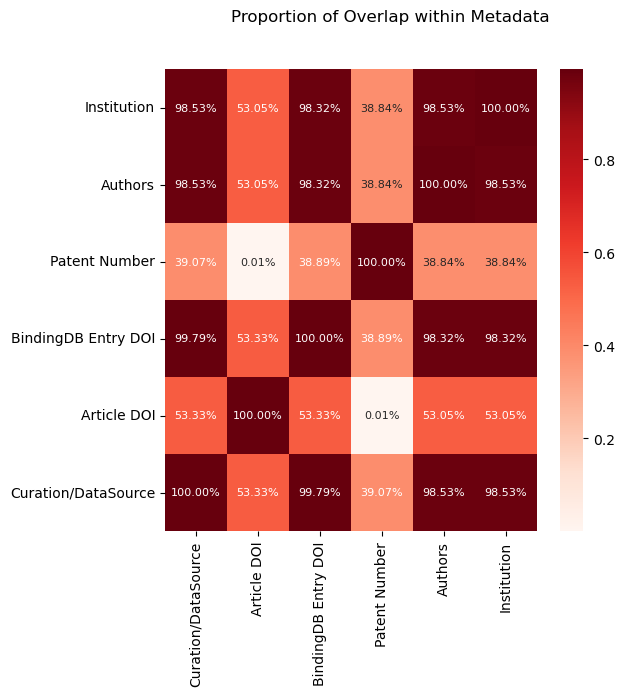

In [18]:
# availability
fig, axs = plt.subplots(nrows=1, ncols=1)
plot_availability(df=df, group=metadata, ax=axs)
plt.suptitle("Available Metadata")
plt.show()

# overlap
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_overlaps(df, metadata, ax=ax)
plt.suptitle("Proportion of Overlap within Metadata")
plt.show()

In [ ]:
in_mapping = {
    "Pfizer": [],
    "MSD": ["Dohme"],
    "Bristol-Myers Squibb": [],
    "Amgen": [],
    "Novartis": [],
    "Janssen": [],
    "Eli Lilly": ["lilly"],
    "Roche": [],
    "Incyte": [],
    "Gilead": [],
    "Bayer": [],
    "Abbott": [],
    "Scripps Research Institute": ["scripps"],
    "The Burnham Institute": ["burnham"],
    "Genentech": [],
    "GlaxoSmithKline": ["gsk"],
    "Astrazeneca": [],
    "Abbvie": [],
    "Merck": [],
    "Boehring": [],
}

f = lambda x: group_categories(
    str(x),
    in_mapping=in_mapping,
    check_key_for_in_mapping=True,
)

df["Institution"] = (
    df["Institution"].apply(f).replace("tba", np.nan).replace("nan", np.nan)
)  # tba = to be attributed

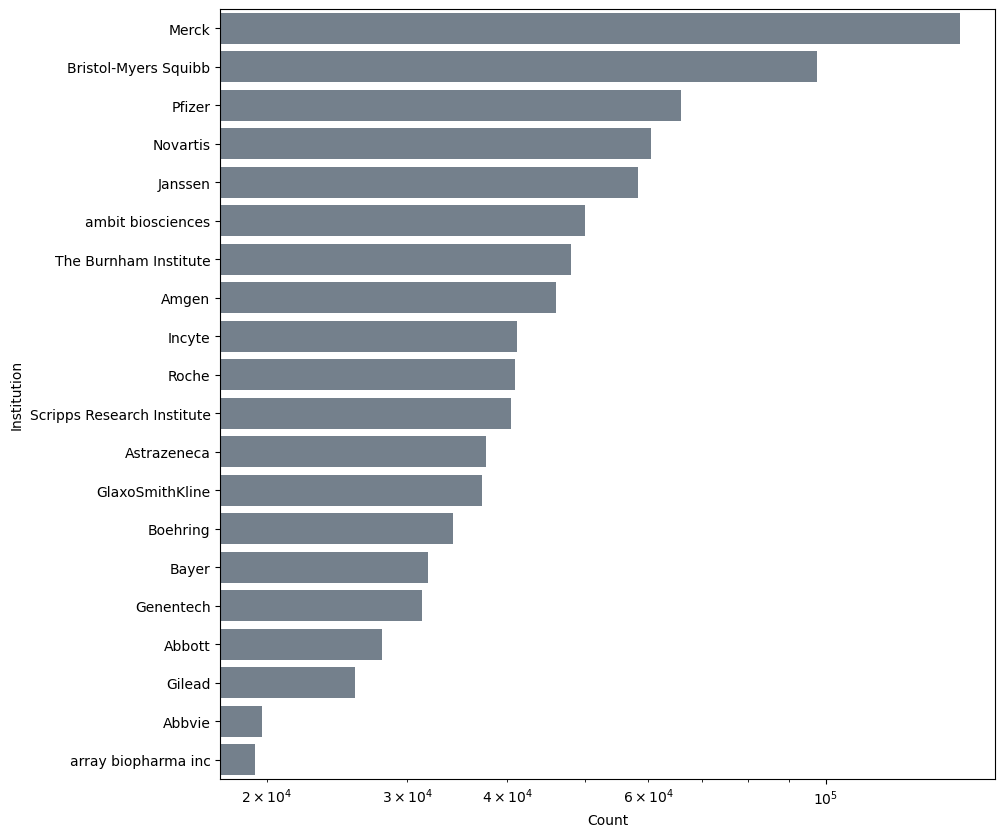

In [22]:
# todo: fix msd vs merck error
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
categorical_countplot(df, "Institution", N=20, ax=ax)
plt.show()

### To do:
- redo plots with plt subplots, availability and overlap together
- (general availability per category)
- interactions/pairplots? -> could hint towards wanting to do regression etc
